# Transportation: Top 60 Priority Intersections
## Group Assignment #2
#### Jessica T. Lopez

For this project two data sets were selected. The first one [Top 60 Priority Intersections](https://jupyter.idre.ucla.edu/hub/user-redirect/lab/tree/data/Top_60_Priority_Intersections.zip) includes all the intersections that have been prioritized for the development of safety projects in Los Angeles.

### Importing Data

In [46]:
# importing pandas and geopandas
import pandas as pd
import geopandas as gpd

In [47]:
# now importing data for the first data set 'Top 60 Priority Intersections'
df = pd.read_csv('Top_60_Priority_Intersections (1).csv')

### Preliminary Inspection

In [48]:
#checking on data type
type(df)

pandas.core.frame.DataFrame

In [49]:
# a peak into how the data looks
df.head (11)

,longitude,latitude,ObjectID,Intersection
0,-118.293400,33.763911,1,Gaffey St & Westmont Dr
1,-118.553566,34.220468,2,Tampa Ave & Roscoe Blvd
2,-118.571047,34.220205,3,Roscoe Blvd & Winnetka Ave
3,-118.288421,34.235491,4,La Tuna Canyon Rd & Rt 210 E/b Off
4,-118.535739,34.035819,5,Pacific Coast Hwy & Temescal Canyon Rd
5,-118.475667,34.171738,6,Burbank Blvd & Woodley Ave
6,-118.256491,34.003943,7,Vernon Ave & Central Ave
7,-118.434886,33.930826,8,Vista Del Mar & Imperial Hwy
8,-118.350916,34.032524,9,La Brea Ave & Adams Blvd
9,-118.291891,33.960030,10,Manchester Ave & Vermont Ave


### Data Types

Will use the df.info (verbose=True, show_counts=True argument because the data has many columns.

In [50]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitude     60 non-null     float64
 1   latitude      60 non-null     float64
 2   ObjectID      60 non-null     int64  
 3   Intersection  60 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


In [51]:
df.dtypes

longitude       float64
latitude        float64
ObjectID          int64
Intersection     object
dtype: object

In [52]:
df.shape 
# looking the total rows and columns

(60, 4)

In [53]:
#now I want to take a look closer look at all the columns to see if I need to trim anything
df.columns.to_list()

['longitude', 'latitude', 'ObjectID', 'Intersection']

In [54]:
# checking data for latitude and longitude columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitude     60 non-null     float64
 1   latitude      60 non-null     float64
 2   ObjectID      60 non-null     int64  
 3   Intersection  60 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


In [55]:
columns_to_keep = ['longitude','latitude','Intersection']
#add it to new data frame
df2 = df[columns_to_keep]

In [56]:
# renaming the columns
columns = list (df2)
columns

['longitude', 'latitude', 'Intersection']

In [57]:
df2.columns=['longitude', 'latitude', 'Intersection']

In [58]:
# now checking dataset for new names
df2.sample(4)

,longitude,latitude,Intersection
42,-118.409434,34.201200,Sherman Way & Bellaire Ave
8,-118.350916,34.032524,La Brea Ave & Adams Blvd
31,-118.502347,34.257521,Devonshire St & Balboa Blvd
12,-118.287089,33.974643,Florence Ave & Hoover St


### From Dataframe(df) to Geodataframe(gdf) 

Since this data set contains latitude and longitude coordinates I will have to convert the dataframe(df) to geodataframe(gdf).
One thing to note, as per Week 4 lab, if the data has latitude and longitude coordinates, it is a geographic coordinate system (GCS) with a crs code epsg:4326.

In [59]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.longitude, df.latitude))

### What is the Projection?

In [61]:
#output the data's projection
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Just as in week 4 lab, the output here is WGS84 as well. Indicating that the data is in geographic coordinate system.

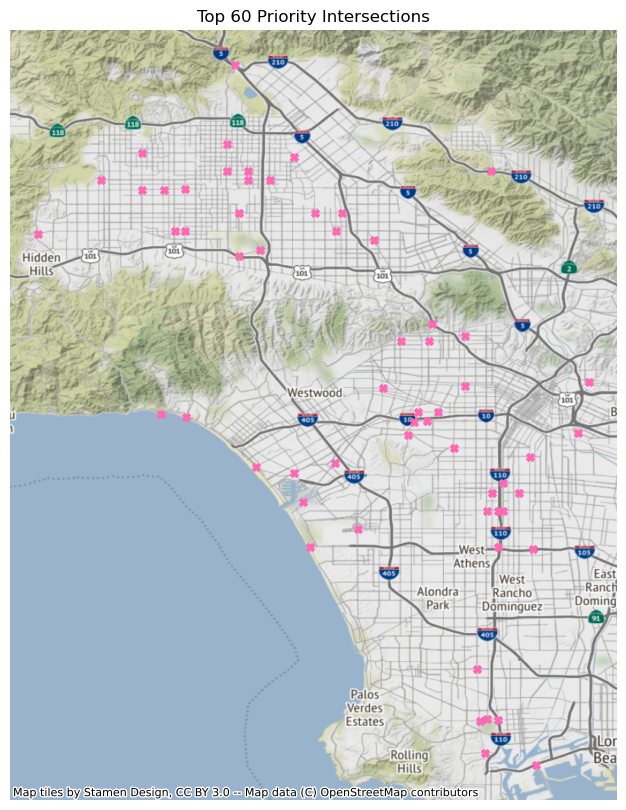

In [65]:
# start the plot
fig, ax = plt.subplots(figsize=(10,10))

# add the data options
gdf.plot(ax=ax, 
        marker='X',
        markersize=30,
        color='hotpink'
    )

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Top 60 Priority Intersections')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

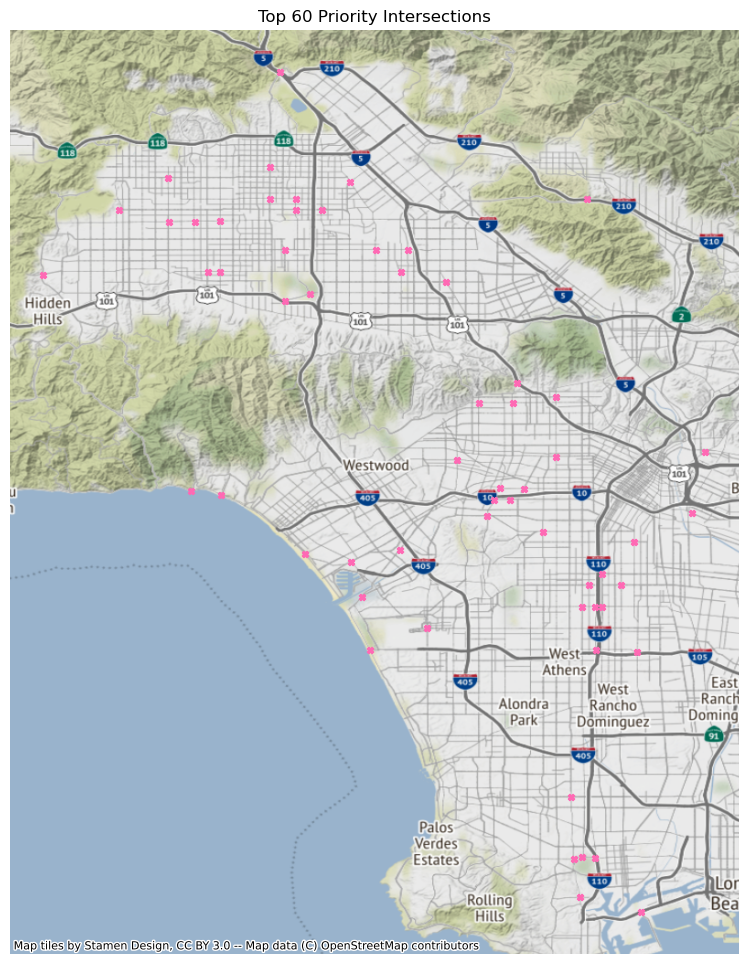

In [63]:
# start the plot
fig, ax = plt.subplots(figsize=(12,12))

# add the data options
gdf.plot(ax=ax, 
        marker='X',
        markersize=20,
        color='hotpink'
    )

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Top 60 Priority Intersections')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)